In [121]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [122]:
file = os.path.join(".", "Data Used", "BYAREA.csv")
income_file = os.path.join(".", "Data Used", "incomebystate.csv")

In [123]:
data = pd.read_csv(file)
incomedata = pd.read_csv(income_file)

In [124]:
#dropping unnecessary labels:
data = data.drop(labels = ["AGE_ADJUSTED_RATE",'AGE_ADJUSTED_CI_UPPER', 'AGE_ADJUSTED_CI_LOWER', 'CRUDE_CI_LOWER', 'CRUDE_CI_UPPER', 'CRUDE_RATE'] ,axis = 1)
data.head()

,AREA,COUNT,EVENT_TYPE,POPULATION,RACE,SEX,SITE,YEAR
0,Alabama,9299,Incidence,2293259,All Races,Female,All Cancer Sites Combined,1999
1,Alabama,4366,Mortality,2293259,All Races,Female,All Cancer Sites Combined,1999
2,Alabama,9467,Incidence,2302835,All Races,Female,All Cancer Sites Combined,2000
3,Alabama,4425,Mortality,2302835,All Races,Female,All Cancer Sites Combined,2000
4,Alabama,9969,Incidence,2309496,All Races,Female,All Cancer Sites Combined,2001


In [125]:
#remove random cities/regions, returning only whole states:
data = data.loc[(data["AREA"] == "Alabama") | (data["AREA"] == "Alaska") | (data["AREA"] == "Arizona") | (data["AREA"] == "Arkansas")
                 | (data["AREA"] == "California") | (data["AREA"] == "Colorado") | (data["AREA"] == "Connecticut") | (data["AREA"] == "Delaware")
                 | (data["AREA"] == "District of Columbia") | (data["AREA"] == "Florida") | (data["AREA"] == "Georgia") | (data["AREA"] == "Hawaii")
                | (data["AREA"] == "Idaho") | (data["AREA"] == "Illinois") | (data["AREA"] == "Indiana") | (data["AREA"] == "Iowa")
                 | (data["AREA"] == "Kansas") | (data["AREA"] == "Kentucky") | (data["AREA"] == "Louisiana") | (data["AREA"] == "Maine") | (data["AREA"] == "Maryland")
                 | (data["AREA"] == "Massachusetts") | (data["AREA"] == "Michigan") | (data["AREA"] == "Minnesota") | (data["AREA"] == "Mississippi")
                 | (data["AREA"] == "Missouri") | (data["AREA"] == "Montana") | (data["AREA"] == "Nebraska") | (data["AREA"] == "Nevada") | (data["AREA"] == "New Hampshire")
                 | (data["AREA"] == "New Jersey") | (data["AREA"] == "New Mexico") | (data["AREA"] == "New York") | (data["AREA"] == "North Carolina") | (data["AREA"] == "North Dakota")
                 | (data["AREA"] == "Ohio") | (data["AREA"] == "Oklahoma") | (data["AREA"] == "Oregon") | (data["AREA"] == "Pennsylvania") | (data["AREA"] == "Rhode Island")
                 | (data["AREA"] == "South Carolina") | (data["AREA"] == "South Dakota") | (data["AREA"] == "Tennessee") | (data["AREA"] == "Texas") | (data["AREA"] == "Utah")
                 | (data["AREA"] == "Vermont") | (data["AREA"] == "Virginia") | (data["AREA"] == "Washington") | (data["AREA"] == "West Virginia") | (data["AREA"] == "Wisconsin")
                 | (data["AREA"] == "Wyoming")]
incomedata = incomedata.loc[(data["AREA"] == "Alabama") | (data["AREA"] == "Alaska") | (data["AREA"] == "Arizona") | (data["AREA"] == "Arkansas")
                 | (data["AREA"] == "California") | (data["AREA"] == "Colorado") | (data["AREA"] == "Connecticut") | (data["AREA"] == "Delaware")
                 | (data["AREA"] == "District of Columbia") | (data["AREA"] == "Florida") | (data["AREA"] == "Georgia") | (data["AREA"] == "Hawaii")
                | (data["AREA"] == "Idaho") | (data["AREA"] == "Illinois") | (data["AREA"] == "Indiana") | (data["AREA"] == "Iowa")
                 | (data["AREA"] == "Kansas") | (data["AREA"] == "Kentucky") | (data["AREA"] == "Louisiana") | (data["AREA"] == "Maine") | (data["AREA"] == "Maryland")
                 | (data["AREA"] == "Massachusetts") | (data["AREA"] == "Michigan") | (data["AREA"] == "Minnesota") | (data["AREA"] == "Mississippi")
                 | (data["AREA"] == "Missouri") | (data["AREA"] == "Montana") | (data["AREA"] == "Nebraska") | (data["AREA"] == "Nevada") | (data["AREA"] == "New Hampshire")
                 | (data["AREA"] == "New Jersey") | (data["AREA"] == "New Mexico") | (data["AREA"] == "New York") | (data["AREA"] == "North Carolina") | (data["AREA"] == "North Dakota")
                 | (data["AREA"] == "Ohio") | (data["AREA"] == "Oklahoma") | (data["AREA"] == "Oregon") | (data["AREA"] == "Pennsylvania") | (data["AREA"] == "Rhode Island")
                 | (data["AREA"] == "South Carolina") | (data["AREA"] == "South Dakota") | (data["AREA"] == "Tennessee") | (data["AREA"] == "Texas") | (data["AREA"] == "Utah")
                 | (data["AREA"] == "Vermont") | (data["AREA"] == "Virginia") | (data["AREA"] == "Washington") | (data["AREA"] == "West Virginia") | (data["AREA"] == "Wisconsin")
                 | (data["AREA"] == "Wyoming")]

#remove this single year parameter from years
data = data[(data["YEAR"] != "2010-2014")]

In [126]:
#create dataframe that is only a total of all races, genders and cancers:
male_data = data[(data["SITE"] == "All Cancer Sites Combined") & (data["RACE"] == "All Races") & (data["SEX"] == "Male")]
female_data = data[(data["SITE"] == "All Cancer Sites Combined") & (data["RACE"] == "All Races") & (data["SEX"] == "Female")]

In [127]:
per_capita_data = incomedata.loc[incomedata["Description"] == "Per capita personal income (dollars) 2/"]
per_capita_data.reset_index(inplace = True, drop = True)

In [128]:
income_list = []
for index, row in per_capita_data.iterrows():
    income_list.append((row["1999"] + row["2000"] + row["2001"]
                      + row["2002"] + row["2003"] + row["2004"] + row["2005"]
                      + row["2006"] + row["2007"] + row["2008"] + row["2009"] + row["2010"]+
                      row["2011"] + row["2012"] + row["2013"] + row["2014"])/16)

In [129]:
income_final_df = pd.DataFrame({"State" : per_capita_data["AREA"], "Avg Income" : income_list})

In [130]:
#reset index and remove subsequent index column that is created so that the below for loop will work:
male_data.reset_index(inplace = True)
male_data.drop(labels="index", axis = 1, inplace=True)

#there are some columns with "~" for "COUNT". These "~", "COUNT" values are always an "incidence"
#and there is no "incidence" data for that state in that year. There is "mortality" data for that state and year,
#but this is irrelevant without "incidence" data. The "mortality" data for that state and that year will always be
#the next row following the "incidence" data. The following for loop will remove the rows with a "~" value as well 
#as the following row with "mortality" data. This is not a common occurence within the dataset and can be safely ignored.
#The following for loop will remove those rows as well as the following, related row. 
for index, row in male_data.iterrows():
    if row["COUNT"] == "~":
        male_data.drop(index, inplace = True)
        male_data.drop(index + 1, inplace = True)
        
#The following will convert "COUNT" to integers, as they were imported as objects. 
male_data["COUNT"] = pd.to_numeric(male_data["COUNT"])

#reset index and remove subsequent index column that is created so that the below for loop will work:
female_data.reset_index(inplace = True)
female_data.drop(labels="index", axis = 1, inplace=True)

#there are some columns with "~" for "COUNT". These "~", "COUNT" values are always an "incidence"
#and there is no "incidence" data for that state in that year. There is "mortality" data for that state and year,
#but this is irrelevant without "incidence" data. The "mortality" data for that state and that year will always be
#the next row following the "incidence" data. The following for loop will remove the rows with a "~" value as well 
#as the following row with "mortality" data. This is not a common occurence within the dataset and can be safely ignored.
#The following for loop will remove those rows as well as the following, related row. 
for index, row in female_data.iterrows():
    if row["COUNT"] == "~":
        female_data.drop(index, inplace = True)
        female_data.drop(index + 1, inplace = True)
        
#The following will convert "COUNT" to integers, as they were imported as objects. 
female_data["COUNT"] = pd.to_numeric(female_data["COUNT"])

C:\Users\Deric_Laptop\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Deric_Laptop\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
C:\Users\Deric_Laptop\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-

In [131]:
#adding column with count of incidences and mortalities per population of state that year
male_data["% of Population"] = (male_data["COUNT"]/male_data["POPULATION"])*100
female_data["% of Population"] = (female_data["COUNT"]/female_data["POPULATION"])*100

C:\Users\Deric_Laptop\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Deric_Laptop\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [132]:
#create two separate datasets for incidence and mortality 
male_pop_incidence_data = male_data.loc[male_data["EVENT_TYPE"] == "Incidence"]
male_pop_mortality_data = male_data.loc[male_data["EVENT_TYPE"] == "Mortality"]

#create two separate datasets for incidence and mortality 
female_pop_incidence_data = female_data.loc[female_data["EVENT_TYPE"] == "Incidence"]
female_pop_mortality_data = female_data.loc[female_data["EVENT_TYPE"] == "Mortality"]

In [133]:
#create new dataframes based on groupbys that give us the average of the % of population to have a 
#cancer incidence or mortality from 1999-2014
#creation of these dataframes is not neccessary to create the below combined dataframe with both 
#incidence and mortality data... but we can use them if we want
male_state_pop_incidences_df = pd.DataFrame(male_pop_incidence_data.groupby(["AREA"]).mean())
male_state_pop_incidences_df.reset_index(inplace = True)
male_state_pop_incidences_df.drop(labels = ["COUNT", "POPULATION"], axis = 1, inplace = True)

male_state_pop_mortality_df = pd.DataFrame(male_pop_mortality_data.groupby(["AREA"]).mean())
male_state_pop_mortality_df.reset_index(inplace = True)
male_state_pop_mortality_df.drop(labels = ["COUNT", "POPULATION"], axis = 1, inplace = True)

male_state_pop_incidence_mortality_combined_df = pd.DataFrame({"State": male_state_pop_incidences_df["AREA"], "Incidence %": male_state_pop_incidences_df["% of Population"],
                                                          "Mortality %": male_state_pop_mortality_df["% of Population"] })



In [134]:
#create new dataframes based on groupbys that give us the average of the % of population to have a 
#cancer incidence or mortality from 1999-2014
#creation of these dataframes is not neccessary to create the below combined dataframe with both 
#incidence and mortality data... but we can use them if we want
female_state_pop_incidences_df = pd.DataFrame(female_pop_incidence_data.groupby(["AREA"]).mean())
female_state_pop_incidences_df.reset_index(inplace = True)
female_state_pop_incidences_df.drop(labels = ["COUNT", "POPULATION"], axis = 1, inplace = True)

female_state_pop_mortality_df = pd.DataFrame(female_pop_mortality_data.groupby(["AREA"]).mean())
female_state_pop_mortality_df.reset_index(inplace = True)
female_state_pop_mortality_df.drop(labels = ["COUNT", "POPULATION"], axis = 1, inplace = True)

female_state_pop_incidence_mortality_combined_df = pd.DataFrame({"State": female_state_pop_incidences_df["AREA"], "Female Incidence %": female_state_pop_incidences_df["% of Population"],
                                                          "Female Mortality %": female_state_pop_mortality_df["% of Population"], "Male Incidence %": male_state_pop_incidences_df["% of Population"],
                                                          "Male Mortality %": male_state_pop_mortality_df["% of Population"], "Avg. Per Capita Income": income_final_df["Avg Income"] })


female_state_pop_incidence_mortality_combined_df.head()

,Avg. Per Capita Income,Female Incidence %,Female Mortality %,Male Incidence %,Male Mortality %,State
0,30578.6875,0.451849,0.189734,0.552327,0.242814,Alabama
1,42357.8125,0.356402,0.112175,0.365980,0.126130,Alaska
2,32152.5625,0.421754,0.156408,0.452680,0.182269,Arizona
3,29526.1250,0.462369,0.199351,0.573004,0.251249,Arkansas
4,40831.7500,0.409525,0.148419,0.429646,0.156684,California


In [135]:
#need to reset index so that when we do the below division of one column and another, the index values match 
male_pop_mortality_data.reset_index(inplace = True)
male_pop_mortality_data.drop(labels="index", axis = 1, inplace=True)

male_pop_incidence_data.reset_index(inplace = True)
male_pop_incidence_data.drop(labels = "index", axis = 1, inplace = True)

#creating dictionary to use for DataFrame about mortality rates
male_state_mortality_total_dict = {"State": male_pop_incidence_data["AREA"], 
                              "Mortality Rate": (male_pop_mortality_data["COUNT"]/male_pop_incidence_data["COUNT"])*100, 
                              "Year": male_pop_incidence_data["YEAR"]}

male_state_mortality_rate_df = pd.DataFrame.from_dict(male_state_mortality_total_dict)

#the above DataFrame will have mortality rate for every year for each state, the below groupby will allow us to 
#have the average of those for each state in a new DataFrame
male_average_state_mortality_df = pd.DataFrame(male_state_mortality_rate_df.groupby(["State"]).mean())
male_average_state_mortality_df.reset_index(inplace = True)

C:\Users\Deric_Laptop\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Deric_Laptop\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [136]:
#need to reset index so that when we do the below division of one column and another, the index values match 
female_pop_mortality_data.reset_index(inplace = True)
female_pop_mortality_data.drop(labels="index", axis = 1, inplace=True)

female_pop_incidence_data.reset_index(inplace = True)
female_pop_incidence_data.drop(labels = "index", axis = 1, inplace = True)

#creating dictionary to use for DataFrame about mortality rates
female_state_mortality_total_dict = {"State": female_pop_incidence_data["AREA"], 
                              "Mortality Rate": (female_pop_mortality_data["COUNT"]/female_pop_incidence_data["COUNT"])*100, 
                              "Year": female_pop_incidence_data["YEAR"]}

female_state_mortality_rate_df = pd.DataFrame.from_dict(female_state_mortality_total_dict)

#the above DataFrame will have mortality rate for every year for each state, the below groupby will allow us to 
#have the average of those for each state in a new DataFrame
female_average_state_mortality_df = pd.DataFrame(female_state_mortality_rate_df.groupby(["State"]).mean())
female_average_state_mortality_df.reset_index(inplace = True)

C:\Users\Deric_Laptop\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Deric_Laptop\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


C:\Users\Deric_Laptop\Anaconda3\envs\PythonData\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


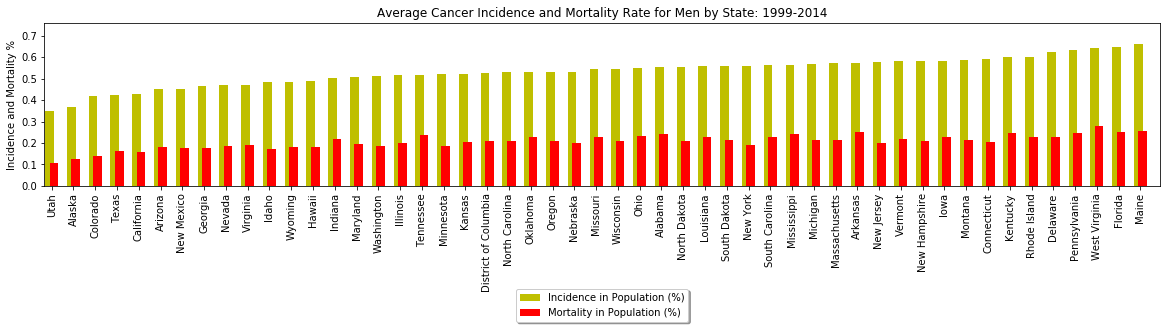

In [137]:
male_state_pop_incidence_mortality_combined_df.sort_values("Incidence %", ascending = True, inplace = True)

male_x_axis = np.arange(len(male_state_pop_incidence_mortality_combined_df))
tick_locations = [value+0.1 for value in male_x_axis]

plt.figure(figsize = (20,3))
plt.xticks(tick_locations, male_state_pop_incidence_mortality_combined_df["State"], rotation="vertical")

plt.xlim(-0.25, len(male_x_axis))
plt.ylim(0, max(male_state_pop_incidence_mortality_combined_df["Incidence %"])+.1)

plt.title("Average Cancer Incidence and Mortality Rate for Men by State: 1999-2014")
plt.ylabel("Incidence and Mortality %")

ax = plt.subplot(111)
male_incidence_bar = ax.bar(male_x_axis-0.2, male_state_pop_incidence_mortality_combined_df["Incidence %"], width=0.4,color='y',align='edge', label = "Incidence in Population (%)")
male_mortality_bar = ax.bar(male_x_axis, male_state_pop_incidence_mortality_combined_df["Mortality %"], width=0.4 ,color='r',align='edge', label = "Mortality in Population (%)")

plt.legend(handles=[male_incidence_bar, male_mortality_bar], loc = "upper center", bbox_to_anchor=(0.5, -0.6), shadow = True )

plt.show()

C:\Users\Deric_Laptop\Anaconda3\envs\PythonData\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


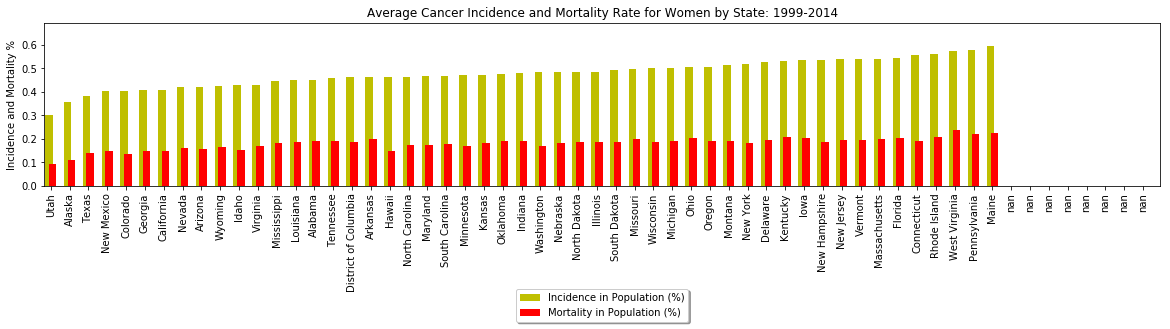

In [138]:
female_state_pop_incidence_mortality_combined_df.sort_values("Female Incidence %", ascending = True, inplace = True)

female_x_axis = np.arange(len(female_state_pop_incidence_mortality_combined_df))
tick_locations = [value+0.1 for value in female_x_axis]

plt.figure(figsize = (20,3))
plt.xticks(tick_locations, female_state_pop_incidence_mortality_combined_df["State"], rotation="vertical")

plt.xlim(-0.25, len(female_x_axis))
plt.ylim(0, max(female_state_pop_incidence_mortality_combined_df["Female Incidence %"])+.1)

plt.title("Average Cancer Incidence and Mortality Rate for Women by State: 1999-2014")
plt.ylabel("Incidence and Mortality %")

ax = plt.subplot(111)
female_incidence_bar = ax.bar(female_x_axis-0.2, female_state_pop_incidence_mortality_combined_df["Female Incidence %"], width=0.4,color='y',align='edge', label = "Incidence in Population (%)")
female_mortality_bar = ax.bar(female_x_axis, female_state_pop_incidence_mortality_combined_df["Female Mortality %"], width=0.4 ,color='r',align='edge', label = "Mortality in Population (%)")

plt.legend(handles=[female_incidence_bar, female_mortality_bar], loc = "upper center", bbox_to_anchor=(0.5, -0.6), shadow = True )

plt.show()

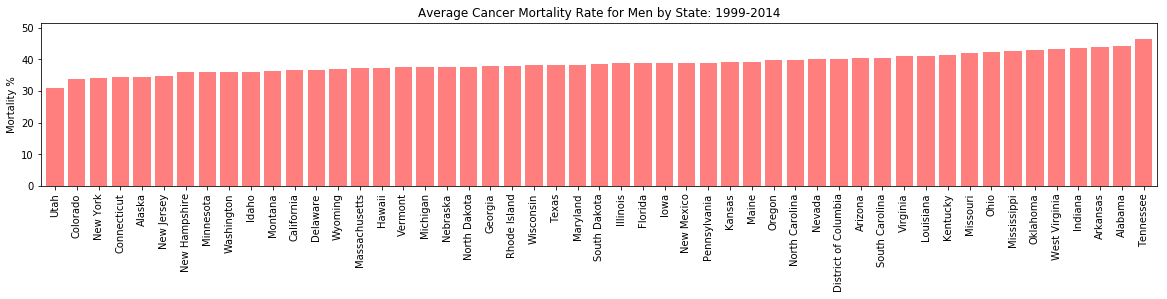

In [139]:
male_average_state_mortality_df.sort_values("Mortality Rate", ascending = True, inplace = True)

x_axis = np.arange(len(male_average_state_mortality_df))
tick_locations = [value+0.4 for value in x_axis]

plt.figure(figsize = (20,3))
plt.xticks(tick_locations, male_average_state_mortality_df["State"], rotation="vertical")

plt.xlim(-0.25, len(x_axis))
plt.ylim(0, max(male_average_state_mortality_df["Mortality Rate"])+5)

plt.title("Average Cancer Mortality Rate for Men by State: 1999-2014")
plt.ylabel("Mortality %")

male_avg_state_mortality_bar = plt.bar(x_axis, male_average_state_mortality_df["Mortality Rate"], alpha = .5, color = "r", align="edge")
plt.show()

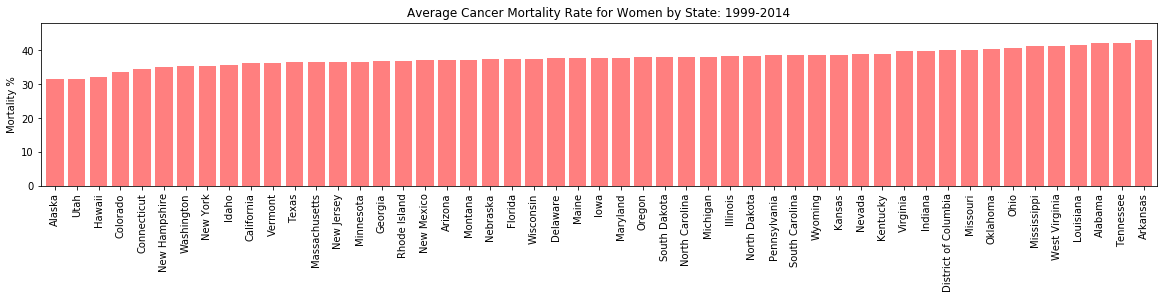

In [140]:
female_average_state_mortality_df.sort_values("Mortality Rate", ascending = True, inplace = True)

x_axis = np.arange(len(female_average_state_mortality_df))
tick_locations = [value+0.4 for value in x_axis]

plt.figure(figsize = (20,3))
plt.xticks(tick_locations, female_average_state_mortality_df["State"], rotation="vertical")

plt.xlim(-0.25, len(x_axis))
plt.ylim(0, max(female_average_state_mortality_df["Mortality Rate"])+5)

plt.title("Average Cancer Mortality Rate for Women by State: 1999-2014")
plt.ylabel("Mortality %")

female_avg_state_mortality_bar = plt.bar(x_axis, female_average_state_mortality_df["Mortality Rate"], alpha = .5, color = "r", align="edge")
plt.show()

In [141]:
female_state_pop_incidence_mortality_combined_df.head()

,Avg. Per Capita Income,Female Incidence %,Female Mortality %,Male Incidence %,Male Mortality %,State
44,30166.2500,0.300930,0.094873,0.348884,0.107583,Utah
1,42357.8125,0.356402,0.112175,0.365980,0.126130,Alaska
43,35326.3750,0.382517,0.139342,0.422544,0.161079,Texas
31,29922.8750,0.403547,0.149323,0.452708,0.175736,New Mexico
5,39594.6875,0.405066,0.136193,0.419456,0.141428,Colorado


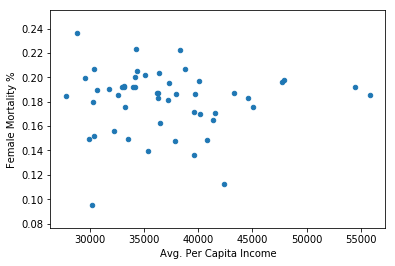

In [146]:
female_state_pop_incidence_mortality_combined_df.plot(kind="scatter",x="Avg. Per Capita Income",y="Female Mortality %")
plt.show()

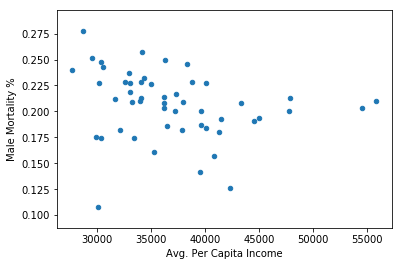

In [147]:
female_state_pop_incidence_mortality_combined_df.plot(kind="scatter",x="Avg. Per Capita Income",y="Male Mortality %")
plt.show()

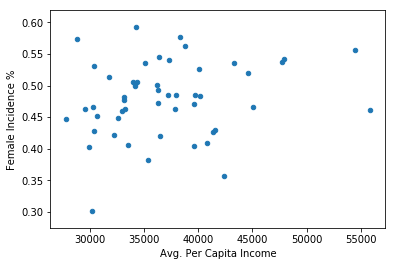

In [148]:
female_state_pop_incidence_mortality_combined_df.plot(kind="scatter",x="Avg. Per Capita Income",y="Female Incidence %")
plt.show()

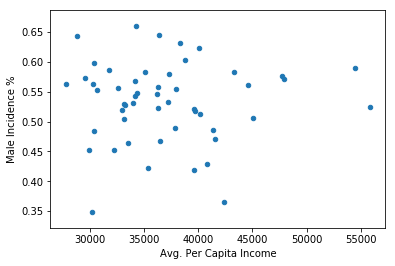

In [149]:
female_state_pop_incidence_mortality_combined_df.plot(kind="scatter",x="Avg. Per Capita Income",y="Male Incidence %")
plt.show()